In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r'application.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,384575,0,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1,214010,0,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
2,142232,0,Cash loans,F,Y,N,0,202500.0,495000.0,39109.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
3,389171,0,Cash loans,F,N,Y,0,247500.0,254700.0,24939.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,283617,0,Cash loans,M,N,Y,0,112500.0,308133.0,15862.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


(array([1.097e+03, 3.109e+03, 3.445e+03, 3.273e+03, 1.965e+03, 1.143e+03,
        6.960e+02, 3.440e+02, 1.460e+02, 6.100e+01, 3.000e+01, 2.900e+01,
        1.100e+01, 9.000e+00, 5.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1980.  ,   9586.05,  17192.1 ,  24798.15,  32404.2 ,  40010.25,
         47616.3 ,  55222.35,  62828.4 ,  70434.45,  78040.5 ,  85646.55,
         93252.6 , 100858.65, 108464.7 , 116070.75, 123676.8 , 131282.85,
        138888.9 , 146494.95, 154101.  , 161707.05, 169313.1 , 176919.15,
        184525.2 , 192131.25, 199737.3 , 207343.35, 214949.4 , 222555.45,
        230161.5 ]),
 <BarContainer object of 30 artists>)

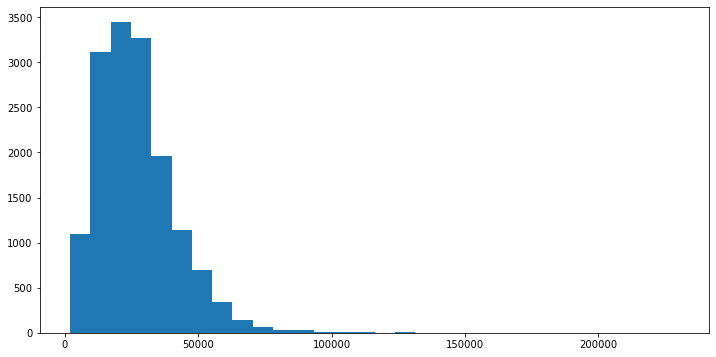

In [5]:
plt.figure(figsize = (12,6))
plt.hist(df['AMT_ANNUITY'], bins = 30)

In [7]:
large_value = df['AMT_ANNUITY'].quantile(0.95)
large_value

53253.0

(array([  9.,  84., 300., 276., 717., 521., 883., 620., 869., 642., 794.,
        821., 812., 812., 942., 597., 631., 722., 459., 455., 489., 347.,
        325., 303., 223., 245., 203., 176., 156., 942.]),
 array([ 1980. ,  3689.1,  5398.2,  7107.3,  8816.4, 10525.5, 12234.6,
        13943.7, 15652.8, 17361.9, 19071. , 20780.1, 22489.2, 24198.3,
        25907.4, 27616.5, 29325.6, 31034.7, 32743.8, 34452.9, 36162. ,
        37871.1, 39580.2, 41289.3, 42998.4, 44707.5, 46416.6, 48125.7,
        49834.8, 51543.9, 53253. ]),
 <BarContainer object of 30 artists>)

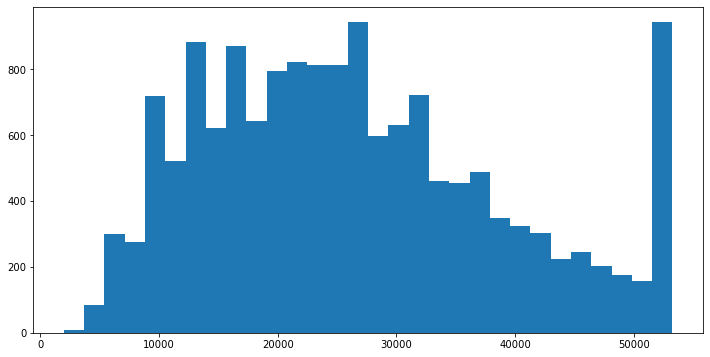

In [8]:
plt.figure(figsize = (12,6))
plt.hist(df['AMT_ANNUITY'].clip(0,large_value), bins = 30)

In [10]:
# Convert to std normal distribution - 
# Find the mean
ds = df['AMT_ANNUITY'].clip(0,large_value)
u = ds.mean()
# Find the standard deviation
sigma = ds.std()
print(u)
print(sigma)

26472.55463414634
12608.928801635886


(array([  9.,  84., 300., 276., 717., 521., 883., 620., 869., 642., 794.,
        821., 812., 812., 942., 597., 631., 722., 459., 455., 489., 347.,
        325., 303., 223., 245., 203., 176., 156., 942.]),
 array([-1.94247704, -1.80693023, -1.67138343, -1.53583662, -1.40028982,
        -1.26474302, -1.12919621, -0.99364941, -0.8581026 , -0.7225558 ,
        -0.587009  , -0.45146219, -0.31591539, -0.18036858, -0.04482178,
         0.09072502,  0.22627183,  0.36181863,  0.49736544,  0.63291224,
         0.76845904,  0.90400585,  1.03955265,  1.17509946,  1.31064626,
         1.44619306,  1.58173987,  1.71728667,  1.85283347,  1.98838028,
         2.12392708]),
 <BarContainer object of 30 artists>)

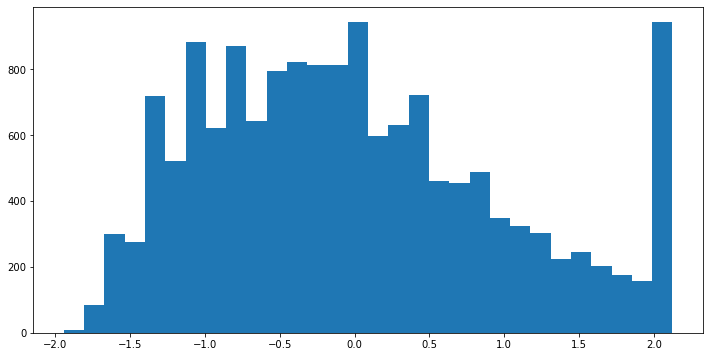

In [12]:
ds_std = (ds-u)/sigma
plt.figure(figsize = (12,6))
plt.hist(ds_std, bins = 30)

0        52641.0
1        48946.5
2        39109.5
3        24939.0
4        15862.5
          ...   
15371    31594.5
15372    20250.0
15373    29700.0
15374    32337.0
15375    32274.0
Name: AMT_ANNUITY, Length: 15376, dtype: float64

(array([2., 0., 4., 1., 5., 2., 2., 2., 1., 1., 4., 2., 1., 4., 2., 3., 2.,
        1., 0., 2., 3., 0., 0., 3., 0., 0., 0., 0., 0., 3.]),
 array([ 4873.5 ,  6486.15,  8098.8 ,  9711.45, 11324.1 , 12936.75,
        14549.4 , 16162.05, 17774.7 , 19387.35, 21000.  , 22612.65,
        24225.3 , 25837.95, 27450.6 , 29063.25, 30675.9 , 32288.55,
        33901.2 , 35513.85, 37126.5 , 38739.15, 40351.8 , 41964.45,
        43577.1 , 45189.75, 46802.4 , 48415.05, 50027.7 , 51640.35,
        53253.  ]),
 <BarContainer object of 30 artists>)

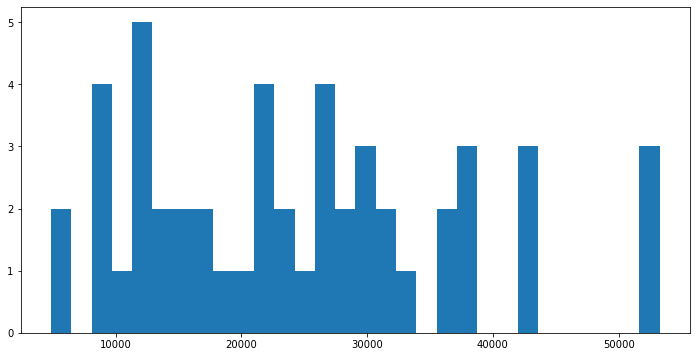

In [15]:
# Make samples
ds_sample = ds.sample(50)

plt.figure(figsize = (12,6))
plt.hist(ds_sample, bins = 30)

(array([1., 1., 4., 2., 2., 6., 6., 6., 5., 6., 5., 6., 7., 2., 6., 0., 5.,
        3., 2., 2., 2., 2., 2., 5., 1., 1., 6., 1., 0., 3.]),
 array([ 5571. ,  7160.4,  8749.8, 10339.2, 11928.6, 13518. , 15107.4,
        16696.8, 18286.2, 19875.6, 21465. , 23054.4, 24643.8, 26233.2,
        27822.6, 29412. , 31001.4, 32590.8, 34180.2, 35769.6, 37359. ,
        38948.4, 40537.8, 42127.2, 43716.6, 45306. , 46895.4, 48484.8,
        50074.2, 51663.6, 53253. ]),
 <BarContainer object of 30 artists>)

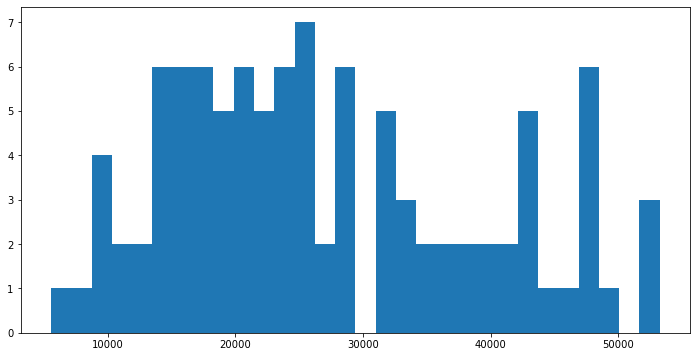

In [16]:
# Take a bigger sample

ds_sample = ds.sample(100)

plt.figure(figsize = (12,6))
plt.hist(ds_sample, bins = 30)

(array([ 5., 13., 15., 14., 20., 31., 19., 27., 20., 12., 25., 20., 22.,
        29., 18., 18., 22., 16., 20., 13., 17., 10.,  7., 12., 10.,  9.,
         3.,  8.,  2., 43.]),
 array([ 4743.,  6360.,  7977.,  9594., 11211., 12828., 14445., 16062.,
        17679., 19296., 20913., 22530., 24147., 25764., 27381., 28998.,
        30615., 32232., 33849., 35466., 37083., 38700., 40317., 41934.,
        43551., 45168., 46785., 48402., 50019., 51636., 53253.]),
 <BarContainer object of 30 artists>)

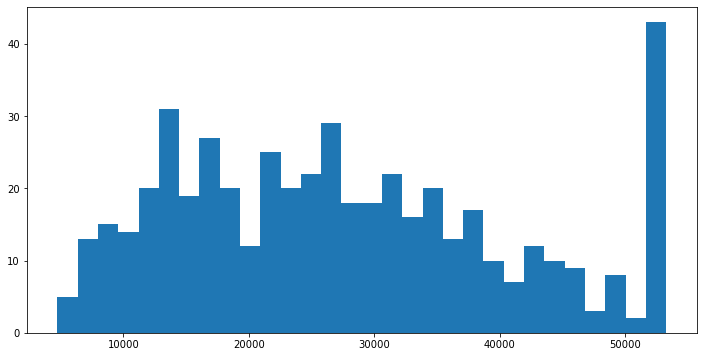

In [17]:
# Take a bigger sample
ds_sample = ds.sample(500)

plt.figure(figsize = (12,6))
plt.hist(ds_sample, bins = 30)

(array([ 5., 16., 24., 17., 25., 35., 27., 41., 17., 32., 45., 51., 39.,
        39., 22., 31., 25., 23., 10., 23., 15., 19., 17., 10., 16., 13.,
         8.,  6.,  8., 41.]),
 array([ 4207.5 ,  5842.35,  7477.2 ,  9112.05, 10746.9 , 12381.75,
        14016.6 , 15651.45, 17286.3 , 18921.15, 20556.  , 22190.85,
        23825.7 , 25460.55, 27095.4 , 28730.25, 30365.1 , 31999.95,
        33634.8 , 35269.65, 36904.5 , 38539.35, 40174.2 , 41809.05,
        43443.9 , 45078.75, 46713.6 , 48348.45, 49983.3 , 51618.15,
        53253.  ]),
 <BarContainer object of 30 artists>)

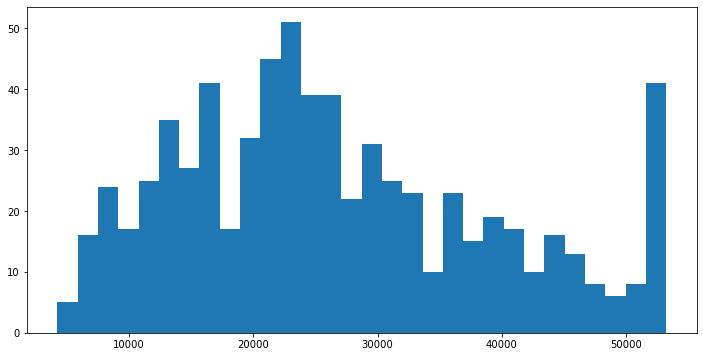

In [18]:
# Take a bigger sample
ds_sample = ds.sample(700)

plt.figure(figsize = (12,6))
plt.hist(ds_sample, bins = 30)

(array([ 5., 12., 23., 37., 34., 35., 53., 48., 50., 36., 48., 60., 50.,
        68., 51., 45., 57., 43., 23., 27., 29., 25., 13., 15., 19., 13.,
         9., 12.,  5., 55.]),
 array([ 3051. ,  4724.4,  6397.8,  8071.2,  9744.6, 11418. , 13091.4,
        14764.8, 16438.2, 18111.6, 19785. , 21458.4, 23131.8, 24805.2,
        26478.6, 28152. , 29825.4, 31498.8, 33172.2, 34845.6, 36519. ,
        38192.4, 39865.8, 41539.2, 43212.6, 44886. , 46559.4, 48232.8,
        49906.2, 51579.6, 53253. ]),
 <BarContainer object of 30 artists>)

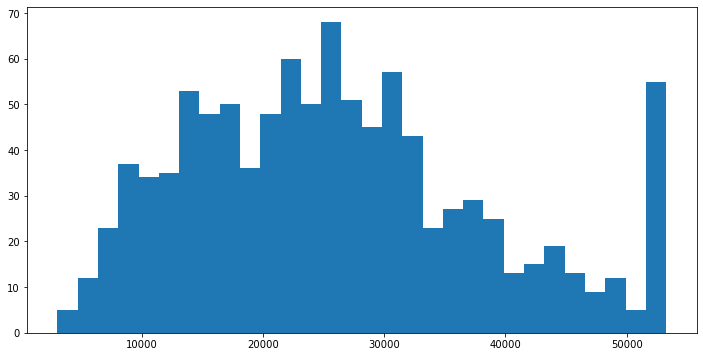

In [19]:
# Take a bigger sample
ds_sample = ds.sample(1000)

plt.figure(figsize = (12,6))
plt.hist(ds_sample, bins = 30)

In [ ]:
# For a normally distributed variable, as we go on increasing the size of the sample, the sample starts following Normal DIstribution

(array([  9.,  84., 300., 276., 717., 521., 883., 620., 869., 642., 794.,
        821., 812., 812., 942., 597., 631., 722., 459., 455., 489., 347.,
        325., 303., 223., 245., 203., 176., 156., 942.]),
 array([ 1980. ,  3689.1,  5398.2,  7107.3,  8816.4, 10525.5, 12234.6,
        13943.7, 15652.8, 17361.9, 19071. , 20780.1, 22489.2, 24198.3,
        25907.4, 27616.5, 29325.6, 31034.7, 32743.8, 34452.9, 36162. ,
        37871.1, 39580.2, 41289.3, 42998.4, 44707.5, 46416.6, 48125.7,
        49834.8, 51543.9, 53253. ]),
 <BarContainer object of 30 artists>)

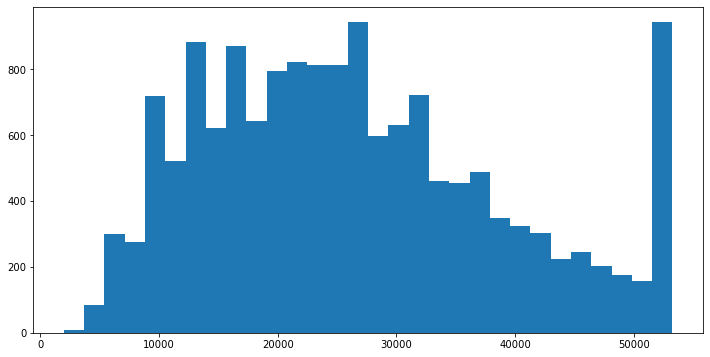

In [28]:
# Plotting the clipped variable 
plt.figure(figsize = (12,6))
plt.hist(ds, bins = 30)

In [26]:
# Now let's take many samples, keep the sample size small
sample_lst = []
for i in range(10000):
    s = ds.sample(50)
    sample_lst.append(s.mean())

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 1.000e+01,
        2.900e+01, 7.000e+01, 1.270e+02, 2.620e+02, 4.070e+02, 6.260e+02,
        8.450e+02, 9.860e+02, 1.144e+03, 1.143e+03, 1.079e+03, 9.600e+02,
        7.880e+02, 5.610e+02, 3.920e+02, 2.660e+02, 1.520e+02, 6.300e+01,
        4.900e+01, 2.100e+01, 9.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([18367.2  , 18889.152, 19411.104, 19933.056, 20455.008, 20976.96 ,
        21498.912, 22020.864, 22542.816, 23064.768, 23586.72 , 24108.672,
        24630.624, 25152.576, 25674.528, 26196.48 , 26718.432, 27240.384,
        27762.336, 28284.288, 28806.24 , 29328.192, 29850.144, 30372.096,
        30894.048, 31416.   , 31937.952, 32459.904, 32981.856, 33503.808,
        34025.76 ]),
 <BarContainer object of 30 artists>)

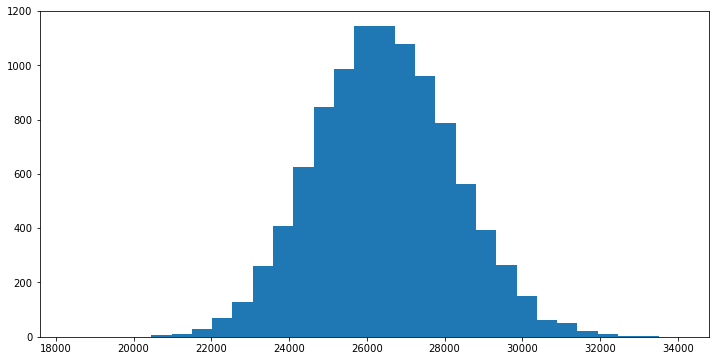

In [27]:
plt.figure(figsize = (12,6))
plt.hist(sample_lst, bins = 30)

In [ ]:
# If we take too many samples and we plot the means of those samples, then it follow normal distribution

(array([1.097e+03, 3.109e+03, 3.445e+03, 3.273e+03, 1.965e+03, 1.143e+03,
        6.960e+02, 3.440e+02, 1.460e+02, 6.100e+01, 3.000e+01, 2.900e+01,
        1.100e+01, 9.000e+00, 5.000e+00, 1.000e+00, 7.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  1980.  ,   9586.05,  17192.1 ,  24798.15,  32404.2 ,  40010.25,
         47616.3 ,  55222.35,  62828.4 ,  70434.45,  78040.5 ,  85646.55,
         93252.6 , 100858.65, 108464.7 , 116070.75, 123676.8 , 131282.85,
        138888.9 , 146494.95, 154101.  , 161707.05, 169313.1 , 176919.15,
        184525.2 , 192131.25, 199737.3 , 207343.35, 214949.4 , 222555.45,
        230161.5 ]),
 <BarContainer object of 30 artists>)

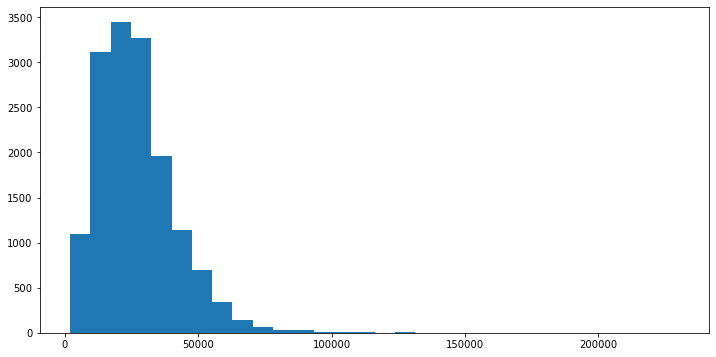

In [30]:
plt.figure(figsize = (12,6))
plt.hist(df['AMT_ANNUITY'], bins = 30)

(array([   3.,    3.,    9.,   26.,   42.,   80.,  138.,  249.,  345.,
         496.,  600.,  752.,  939., 1006., 1022.,  925.,  868.,  737.,
         552.,  415.,  332.,  192.,  114.,   77.,   32.,   14.,   20.,
           8.,    2.,    2.]),
 array([24759.963 , 24920.8842, 25081.8054, 25242.7266, 25403.6478,
        25564.569 , 25725.4902, 25886.4114, 26047.3326, 26208.2538,
        26369.175 , 26530.0962, 26691.0174, 26851.9386, 27012.8598,
        27173.781 , 27334.7022, 27495.6234, 27656.5446, 27817.4658,
        27978.387 , 28139.3082, 28300.2294, 28461.1506, 28622.0718,
        28782.993 , 28943.9142, 29104.8354, 29265.7566, 29426.6778,
        29587.599 ]),
 <BarContainer object of 30 artists>)

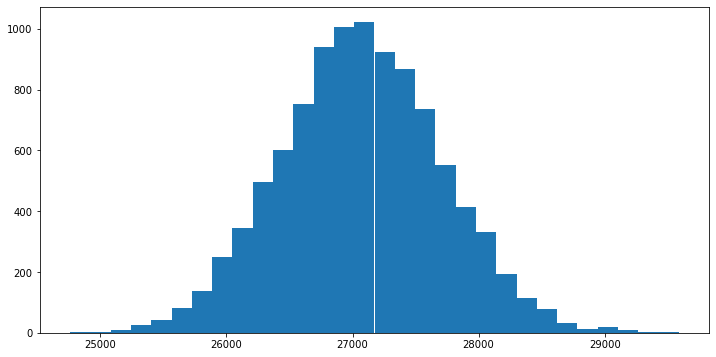

In [54]:
n_samples = 10000
sample_size = 500
sample_lst = []
for i in range(n_samples):
    s = df['AMT_ANNUITY'].sample(sample_size)
    sample_lst.append(s.mean())
plt.figure(figsize = (12,6))
plt.hist(sample_lst, bins = 30)

In [55]:

print("Actual Mean", df['AMT_ANNUITY'].mean())
print("Mean of many sample means", np.mean(np.array(sample_lst)))
print("Actual STD", df['AMT_ANNUITY'].std())
print("SD of many sample means", np.std(np.array(sample_lst)))



Actual Mean 27076.127707317075
Mean of many sample means 27066.89154718858
Actual STD 14493.183809118882
SD of many sample means 637.7446178510892


In [56]:
# The mean of those samples is close to the actual mean
0.1/0.02

5.0

In [57]:
0.1/0.001

100.0